In [4]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv("avocado.csv")
data.shape

(18249, 14)

In [6]:
data.sample(4)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8230,17,2017-09-03,1.64,59583.07,2114.45,36157.55,13.49,21297.58,18165.54,2042.04,1090.0,conventional,2017,Syracuse
13073,48,2016-01-24,1.47,9297.50,1706.27,4796.37,0.00,2794.86,2788.43,6.43,0.0,organic,2016,LasVegas
12661,0,2016-12-25,2.04,1361.01,84.29,813.39,0.00,463.33,463.33,0.00,0.0,organic,2016,GrandRapids
12170,29,2016-06-05,1.49,12722.85,6.81,566.84,0.00,12149.20,10325.26,1823.94,0.0,organic,2016,Boston


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [10]:
#reason of changing name of these col is PLU code has giving .
#The hass Avacodo board have six diff code 4046,4225,4225, fo9r non_organic 94046,94225,94770 for organic 
data.rename(columns={'4046':'non_organgic small avocado','4225':'non_organgic large avocado','4770':'non_organgic extra large avocado'},inplace=True)

In [11]:
data.head(1)

,Unnamed: 0,Date,AveragePrice,Total Volume,non_organgic small avocado,non_organgic large avocado,non_organgic extra large avocado,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany


### Total bags = small bags + large bags + XLarge bags


### Total volume = 4046 + 4225 + 4770 + total bags

In [12]:
#Problem Statement :
#In this dataset you will be working with the avocado dataset. It contains prices and quantities of avocados sold over time in various regions.
#Task is to predict out the overall revenue for each unique date.


In [13]:
data.nunique()

Unnamed: 0                             53
Date                                  169
AveragePrice                          259
Total Volume                        18237
non_organgic small avocado          17702
non_organgic large avocado          18103
non_organgic extra large avocado    12071
Total Bags                          18097
Small Bags                          17321
Large Bags                          15082
XLarge Bags                          5588
type                                    2
year                                    4
region                                 54
dtype: int64

In [14]:
# Check for NA values
data.isnull().sum()

Unnamed: 0                          0
Date                                0
AveragePrice                        0
Total Volume                        0
non_organgic small avocado          0
non_organgic large avocado          0
non_organgic extra large avocado    0
Total Bags                          0
Small Bags                          0
Large Bags                          0
XLarge Bags                         0
type                                0
year                                0
region                              0
dtype: int64

In [15]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,non_organgic small avocado,non_organgic large avocado,non_organgic extra large avocado,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [16]:
# i simple drop that columns
data.drop("Unnamed: 0",axis=1,inplace=True)

In [17]:
print(data["Date"].dtypes)

object


In [133]:
#Convert date column to "datetime" variable
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values("Date", inplace = True)
data.set_index('Date', inplace=True) 
# Setting the index to "datetime" helps in plotting time series

In [134]:
print(data.index.min())
print(data.index.max())

2015-01-04 00:00:00
2018-03-25 00:00:00


In [135]:
data.index

DatetimeIndex(['2015-01-04', '2015-01-04', '2015-01-04', '2015-01-04',
               '2015-01-04', '2015-01-04', '2015-01-04', '2015-01-04',
               '2015-01-04', '2015-01-04',
               ...
               '2018-03-25', '2018-03-25', '2018-03-25', '2018-03-25',
               '2018-03-25', '2018-03-25', '2018-03-25', '2018-03-25',
               '2018-03-25', '2018-03-25'],
              dtype='datetime64[ns]', name='Date', length=18249, freq=None)

In [136]:
# The current data is at a daily level(with lot of "missing days"). 
# In time series analysis, it is usually advisable
# to roll up/ aggregate the data at a higher level, like week or month
# We will consider averaging (rollup) the price at monthly level 

In [137]:
data1 = data['AveragePrice'].resample('MS').mean() # MS stands for Month Start.

In [138]:
data1.head()

Date
2015-01-01    1.365046
2015-02-01    1.326944
2015-03-01    1.361981
2015-04-01    1.383449
2015-05-01    1.344685
Freq: MS, Name: AveragePrice, dtype: float64

In [139]:
data2 = data['AveragePrice'].resample('W').mean() #  stands for Month Start.

In [140]:
data2.head()

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
Freq: W-SUN, Name: AveragePrice, dtype: float64

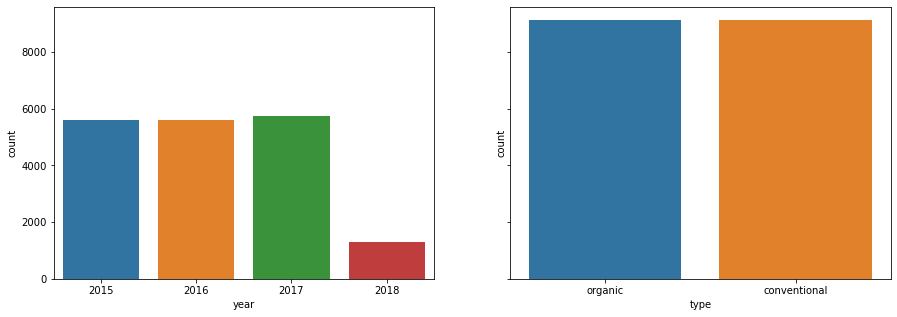

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(data['year'],ax=axes[0])
sns.countplot(data['type'],ax=axes[1])
plt.show()

#### all year contain same no of recorded except 2018 
#### organic avocado  and conventional avocado same no of count

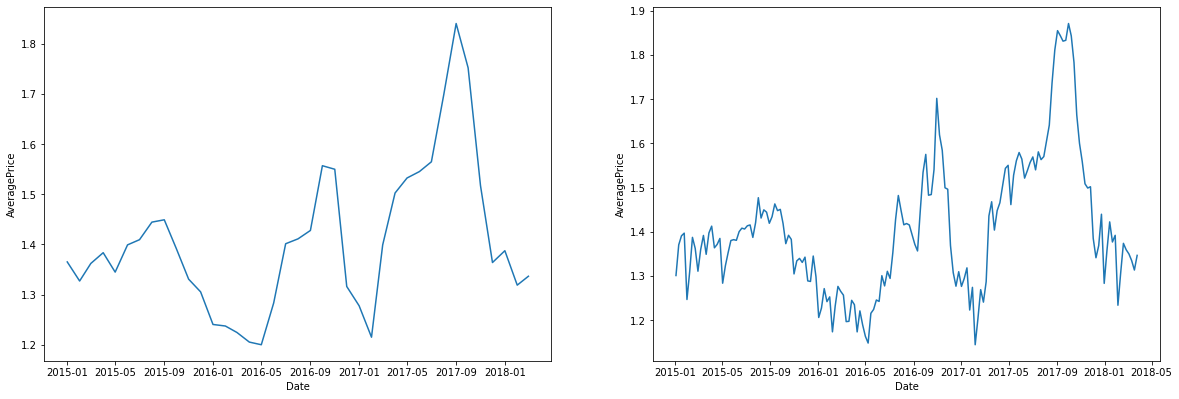

In [86]:
f, ax = plt.subplots(1,2,figsize=(20, 6.5))
sns.lineplot(x = data1.index, y = data1,ax=ax[0])
sns.lineplot(x = data2.index, y = data2,ax=ax[1])
plt.show()

#### From the lineplots above:
At the week and monthly average price we see a decline in price in January 2016-2017 y. We can conclude that in winter avocados are not in demand, or there were a too much avocados in shops;
At the average price per year chart we see a steady decline from 2015 to 2016 y.
After that there is an increase, the peak is in 2017 year.

In [87]:
data3 = data['Total Volume'].resample('MS').mean() # MS stands for Month Start.
data4 = data['Total Volume'].resample('W').mean() # W stands for week

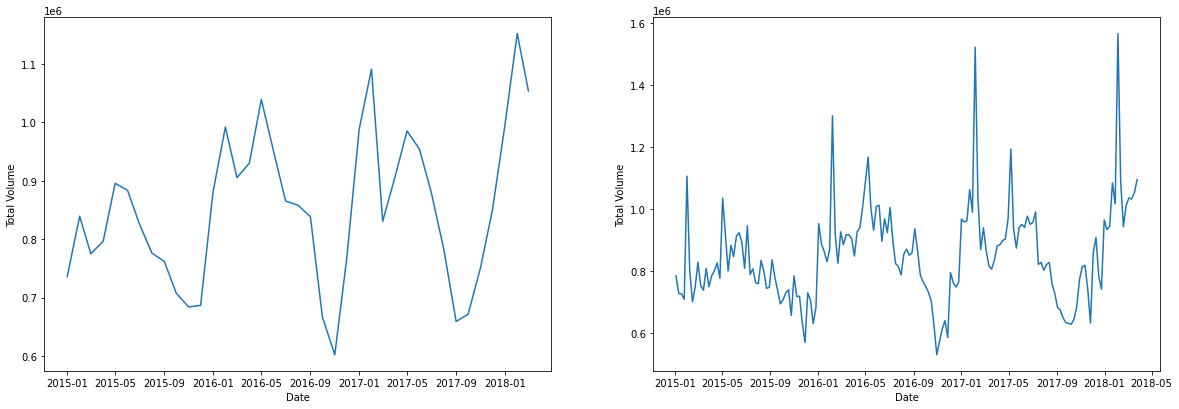

In [88]:
f, ax = plt.subplots(1,2,figsize=(20, 6.5))
sns.lineplot(x = data3.index, y = data3,ax=ax[0])
sns.lineplot(x = data4.index, y = data4,ax=ax[1])
plt.show()

#### here you can directly see the how price  effect the volume of consumption 
you can clearly see starting of every year demand  touch there peak 
there is two reason can happen one price of avacado is down because of large production that time 
second shopes starting store because of cheap price .

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

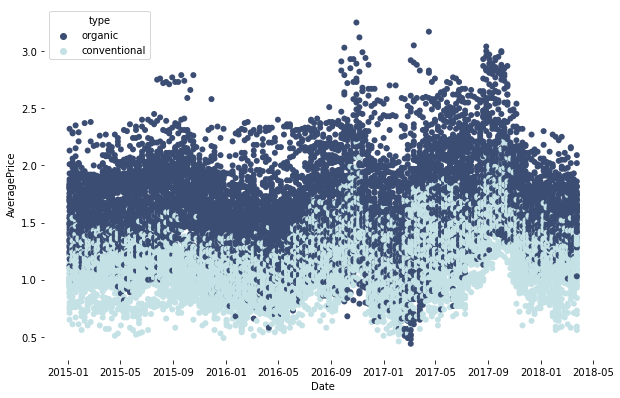

In [61]:
# Draw a scatter plot while assigning point colors 
# variables in the dataset
f, ax = plt.subplots(figsize=(10, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Date", y="AveragePrice",
                hue="type",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=data, ax=ax)

#### what i see in this graph organic  avocado price is always higer than conventional avocado
#### in some point mid 2017 organic avocado price fall  and again go in peak price at end

In [111]:
# group based on order date 
Gdata1= data.groupby('Date')['non_organgic small avocado'].mean().reset_index().copy()
Gdata2= data.groupby('Date')['non_organgic large avocado'].mean().reset_index().copy()
Gdata3= data.groupby('Date')['non_organgic extra large avocado'].mean().reset_index().copy()

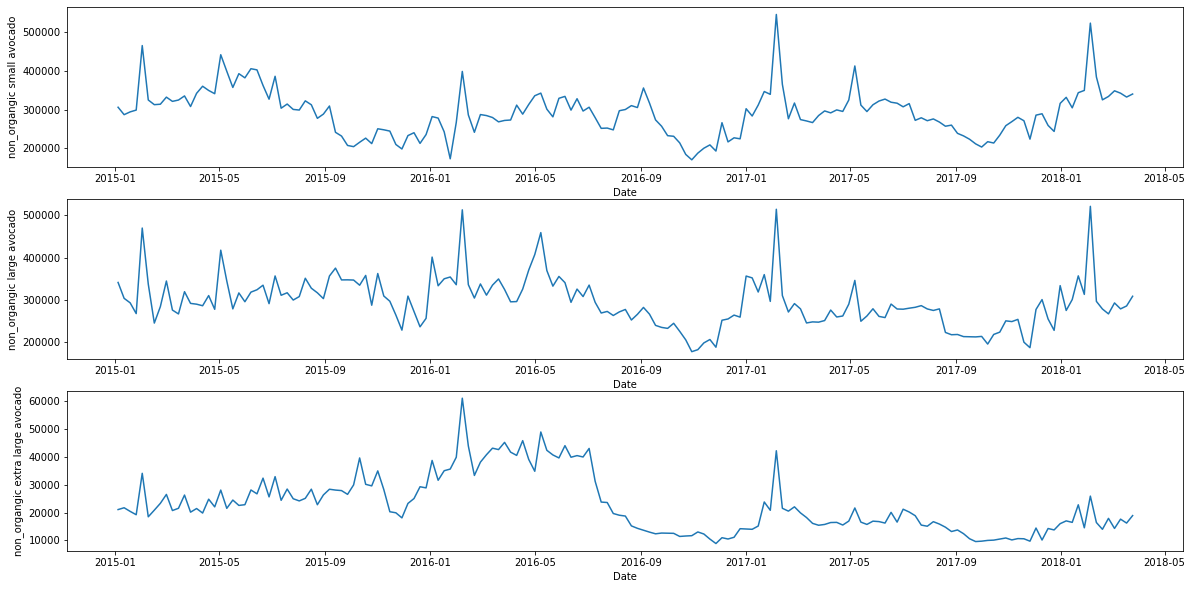

In [114]:
f, ax = plt.subplots(3,1,figsize=(20, 10))
sns.lineplot(x=Gdata1["Date"], y=Gdata1['non_organgic small avocado'],ax=ax[0])
sns.lineplot(x=Gdata2["Date"], y=Gdata2['non_organgic large avocado'],ax=ax[1])
sns.lineplot(x=Gdata3["Date"], y=Gdata3['non_organgic extra large avocado'],ax=ax[2])
plt.show()

#### all three category of avacado react same when inc all get increase when dec all get decrease in demand 
#### demand of  small and large avocado lie b/w  2L to 5L and demand of extra large avocado  is 10K to 60K

In [145]:
# group based on order date small bag large bag and Xlarge bags
Gdata4= data.groupby('Date')['Small Bags','Large Bags','XLarge Bags'].mean().reset_index().copy()

<AxesSubplot:>

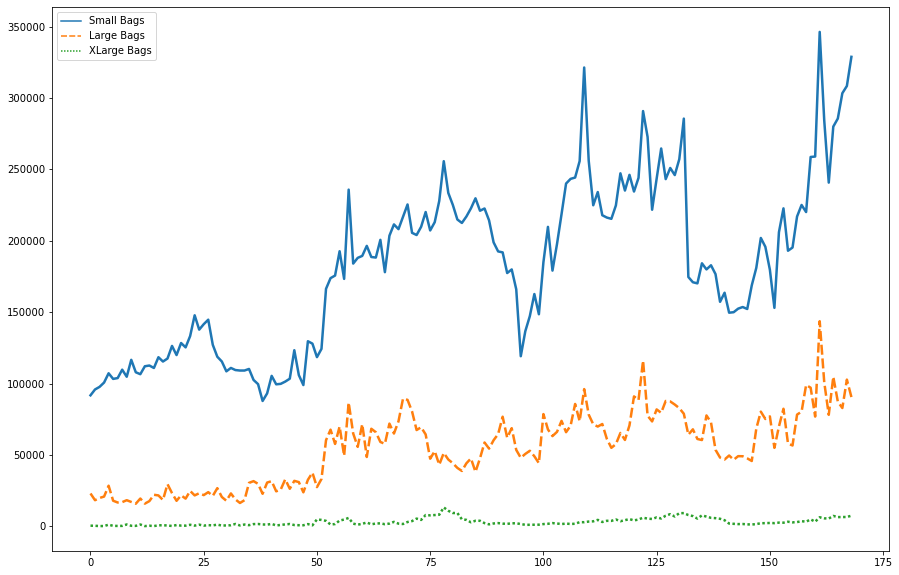

In [147]:
f, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=Gdata4, palette="tab10",linewidth=2.5)

<AxesSubplot:xlabel='region', ylabel='Total Volume'>

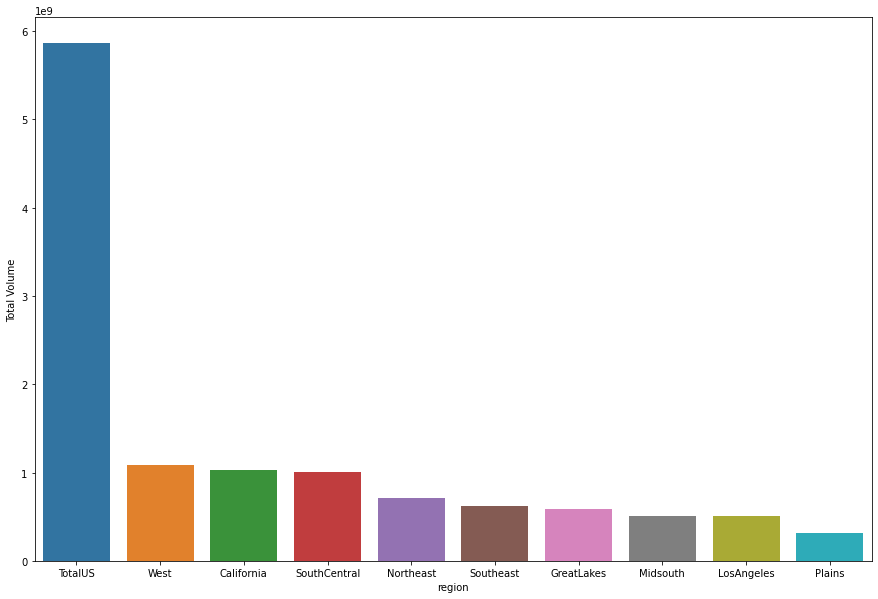

In [22]:
ten_largest_volume_regions = data.groupby(['region'])['Total Volume'].sum().sort_values(ascending=False).reset_index().head(10)
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=ten_largest_volume_regions,x='region', y='Total Volume')

####  top 10 ten country based on total comsumption .where US consumption of avocado is very high campare to other region

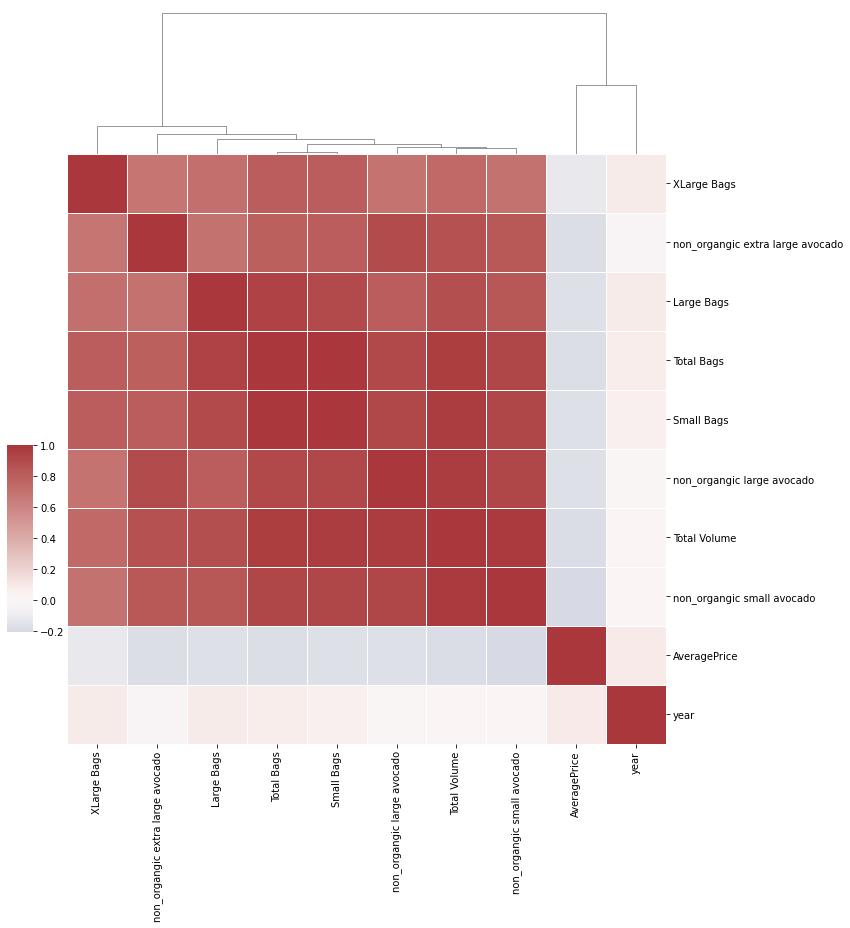

In [21]:
# Draw the heat map 
g = sns.clustermap(data.corr(), center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

#### their is lot of col where multi-colinearity is present .means if i change one col other also get effected 

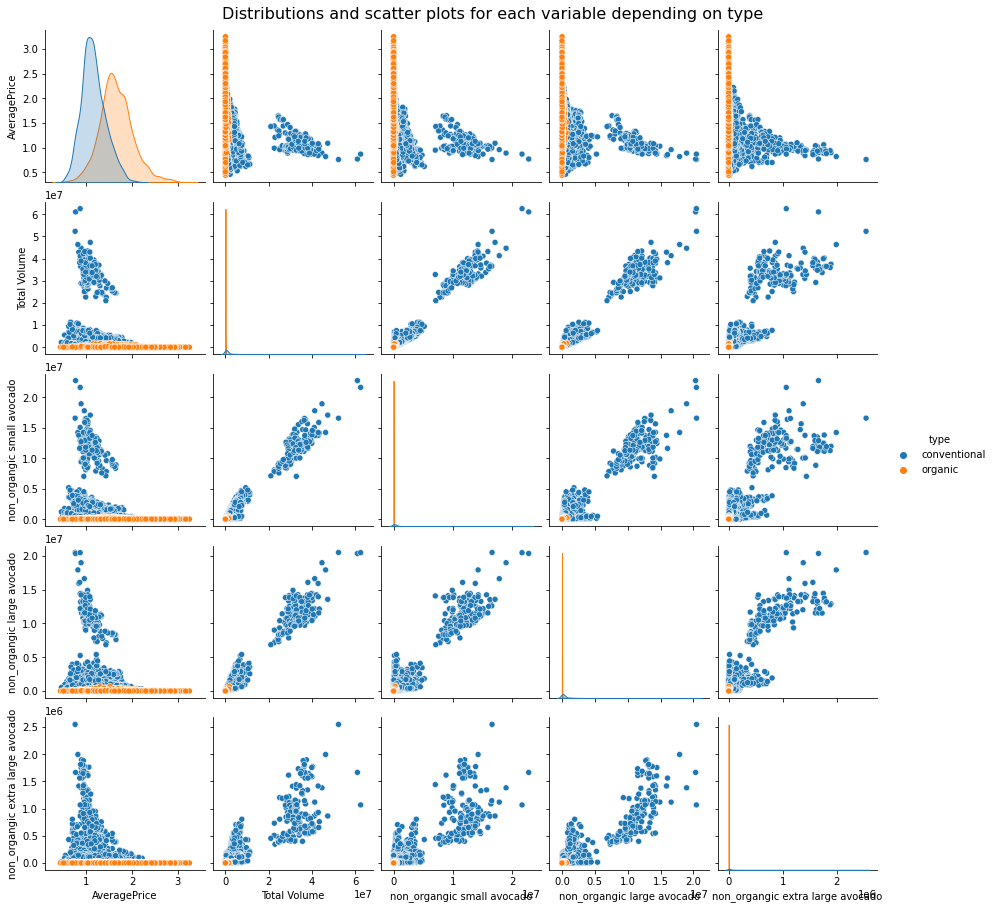

In [23]:
columns_for_research = ['AveragePrice', 'Total Volume', 'non_organgic small avocado','non_organgic large avocado','non_organgic extra large avocado', 'type']
g = sns.pairplot(data=data[columns_for_research], hue="type")
g.fig.suptitle("Distributions and scatter plots for each variable depending on type", y=1.01, size=16)
plt.show()

#### what i observe from the pair plot lots of columns show me linear relationship  and how conventional and organic distributed respected to each columns 

In [156]:
data.columns

Index(['AveragePrice', 'Total Volume', 'non_organgic small avocado',
       'non_organgic large avocado', 'non_organgic extra large avocado',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')